In [27]:
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [28]:
import string
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from tqdm import tqdm
%matplotlib inline


<a id='one_'></a>
# 1. Importing DataFrames

In [31]:
biorxiv_data = pd.read_csv('CORD19/biorxiv_medrxiv/biorxiv_medrxiv.csv')
comm_data = pd.read_csv('CORD19/comm_use_subset/comm_use_subset.csv')
noncomm_data = pd.read_csv('CORD19/noncomm_use_subset/noncomm_use_subset.csv')
pmc_data = pd.read_csv('CORD19/custom_license/custom_license.csv')

In [32]:
biorxiv_data.head(3)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,bbf09194127619f57b3ddf5daf684593a5831367,The Effectiveness of Targeted Quarantine for M...,"Alastair Jamieson-Lane, Eric Cytrnbaum",Alastair Jamieson-Lane (Carl von Ossietzky Uni...,Abstract\n\nWe model the extent to which age t...,"Introduction\n\nCOVID-19, initially observed/d...",Impact of non-pharmaceutical interventions (NP...,"[{'first': 'Alastair', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Impact ..."
1,2a21fdd15e07c89c88e8c2f6c6ab5692568876ec,Evaluation of Group Testing for SARS-CoV-2 RNA,"Nasa Sinnott-Armstrong, Daniel L Klein, Brenda...","Nasa Sinnott-Armstrong, Daniel L Klein, Brenda...",Abstract\n\nDuring the current COVID-19 pandem...,Introduction\n\nGroup testing was first descri...,"In one Italian town, we showed mass testing co...","[{'first': 'Nasa', 'middle': [], 'last': 'Sinn...","{'BIBREF0': {'ref_id': 'b0', 'title': 'In one ..."
2,e686d1ce1540026ecb100c09f99ed091c139b92c,Why estimating population-based case fatality ...,"Lucas Böttcher, Mingtao Xia, Tom Chou","Lucas Böttcher, Mingtao Xia (UCLA, 90095-1555,...",Abstract\n\nDifferent ways of calculating mort...,\n\nDifferent ways of calculating mortality ra...,"COVID-19 statistics, , , None; The Lancet, Z X...","[{'first': 'Lucas', 'middle': [], 'last': 'Böt...","{'BIBREF2': {'ref_id': 'b2', 'title': 'COVID-1..."


In [33]:
comm_data.head(3)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,37cf1eb9be84f2b178b4d60de7ba9520deccf453,Processing of the SARS-CoV pp1a/ab nsp7-10 region,"Boris Krichel, Sven Falke, Rolf Hilgenfeld, La...",Boris Krichel (Leibniz Institute for Experimen...,Abstract\n\nSevere acute respiratory syndrome ...,Introduction\n\nThe discovery of severe acute ...,Identification of a novel coronavirus in patie...,"[{'first': 'Boris', 'middle': [], 'last': 'Kri...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Identif..."
1,8d095d0275e474dbb9d9b63a75591ff2c0667d73,Evidence of Recombination and Genetic Diversit...,"Ting Huang, Wei Wang, Mael Bessaud, Peijun Ren...","Ting Huang (Unit of Emerging Viruses, Shanghai...",Abstract\n\nBackground: Human rhinoviruses (HR...,Introduction\n\nHuman rhinoviruses (HRVs) are ...,"Rhinovirus and the lower respiratory tract, F ...","[{'first': 'Ting', 'middle': [], 'last': 'Huan...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Rhinovi..."
2,43918c75d7b7d3f9402b1342dfea1e19eb2bd909,Antibacterial Properties of Visible-Light-Resp...,"Der-Shan Sun, Jyh-Hwa Kau, Hsin-Hsien Huang, Y...","Der-Shan Sun (Tzu-Chi University, 97004, Huali...",Abstract\n\nThe bactericidal activity of conve...,Introduction\n\nAnthrax is a life-threatening ...,"Anthrax in humans and animals, , Anthrax in Hu...","[{'first': 'Der-Shan', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Anthrax..."


In [34]:
noncomm_data.head(3)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,cd92f91038067e7a10aa27d676ce696e1e4d67ce,EXPERIMENTAL AND THERAPEUTIC MEDICINE Dimethyl...,"Zhen-Hong Zhu, Wen-Qi Song, Chang-Qing Zhang, ...","Zhen-Hong Zhu (Shanghai Jiao Tong University, ...",Abstract\n\nMesenchymal stem cells have been w...,Introduction\n\nOsteonecrosis of the femoral h...,Avascular necrosis of the femoral head: Vascul...,"[{'first': 'Zhen-Hong', 'middle': [], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Avascul..."
1,bab279da548d8bd363acd5033e9dc54e7dbb7107,Effects of school breaks on influenza- like il...,"Yanhui Chu, Zhenyu Wu, Jiayi Ji, Jingyi Sun, X...","Yanhui Chu, Zhenyu Wu (Fudan University, Shang...",NaN,INTRODUCTION\n\nSchoolchildren play a major ro...,Estimating household and community transmissio...,"[{'first': 'Yanhui', 'middle': [], 'last': 'Ch...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Estimat..."
2,71edbd57cdd9af956a12054932e0cbdb87ce1fea,Social Network Characteristics and Body Mass I...,"Won Joon Lee, Yoosik Youm, Yumie Rhee, Yeong-R...",Won Joon Lee (Yonsei University College of Med...,Abstract\n\nResearch has shown that obesity ap...,INTRODUCTION\n\nThe study of the effects of so...,The contribution of the social environment to ...,"[{'first': 'Won', 'middle': ['Joon'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The con..."


In [35]:
pmc_data.head(3)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,14572a7a9b3e92b960d92d9755979eb94c448bb5,Immune Parameters of Dry Cows Fed Mannan Oligo...,"S T Franklin, M C Newman, K E Newman, K I Meek","S T Franklin (University of Kentucky, 40546-02...",Abstract\n\nThe objective of this study was to...,INTRODUCTION\n\nThe periparturient period is a...,Immune response of pregnant heifers and cows t...,"[{'first': 'S', 'middle': ['T'], 'last': 'Fran...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Immune ..."
1,bb790e8366da63c4f5e2d64fa7bbd5673b93063c,Discontinuous Transcription or RNA Processing ...,"Beate Schwer, Paolo Vista, Jan C Vos, Hendrik ...","Beate Schwer, Paolo Vista, Jan C Vos, Hendrik ...",NaN,Discontinuous\n\nTranscription or RNA Processi...,Poly (riboadenylic acid) preferentially inhibi...,"[{'first': 'Beate', 'middle': [], 'last': 'Sch...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Poly (r..."
2,24f204ce5a1a4d752dc9ea7525082d225caed8b3,NaN,NaN,NaN,NaN,Letter to the Editor\n\nThe non-contact handhe...,Novel coronavirus is putting the whole world o...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Novel c..."


<a id='two_'></a>
# 2. Word Clouds of Authors

## 2.1 Word Cloud of Authors in biorxiv medrxiv Data

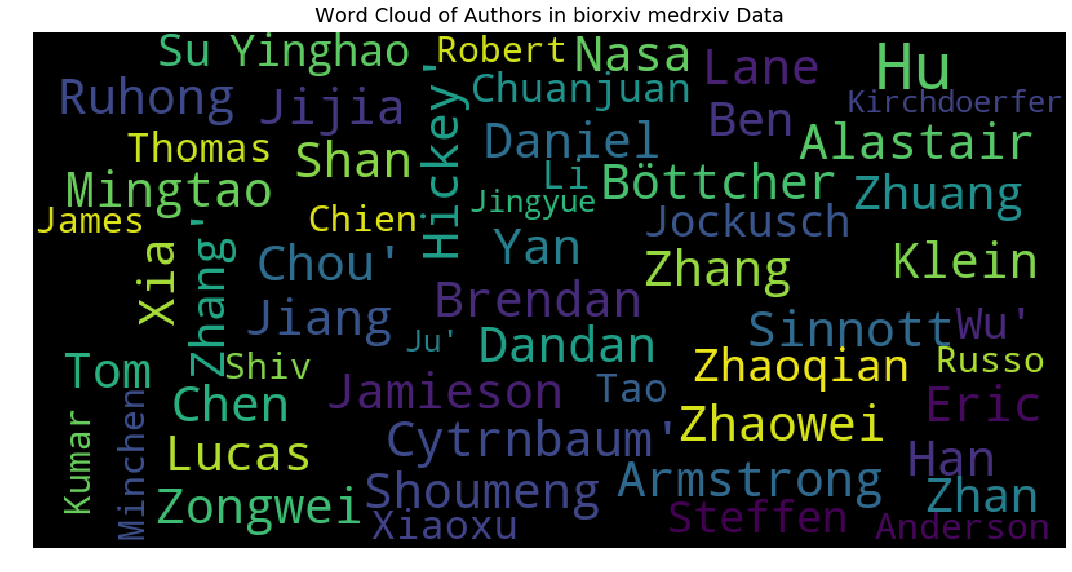

In [36]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=50, figure_size=(15.0,15.0), 
                   title = None, title_size=20, image_color=False,color = color):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(biorxiv_data['authors'].values, title="Word Cloud of Authors in biorxiv medrxiv Data",color = 'black')

## 2.2 Word Cloud of Authors in comm use subset Data

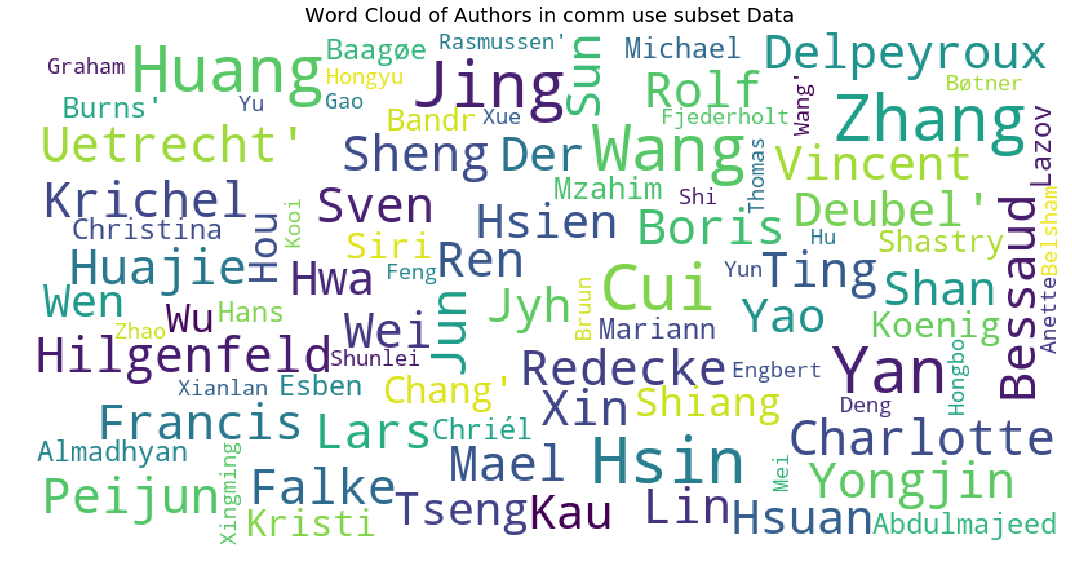

In [37]:
plot_wordcloud(comm_data['authors'].values, title="Word Cloud of Authors in comm use subset Data",color = 'white')

## 2.3 Word Cloud of Authors in Non common use subset Data

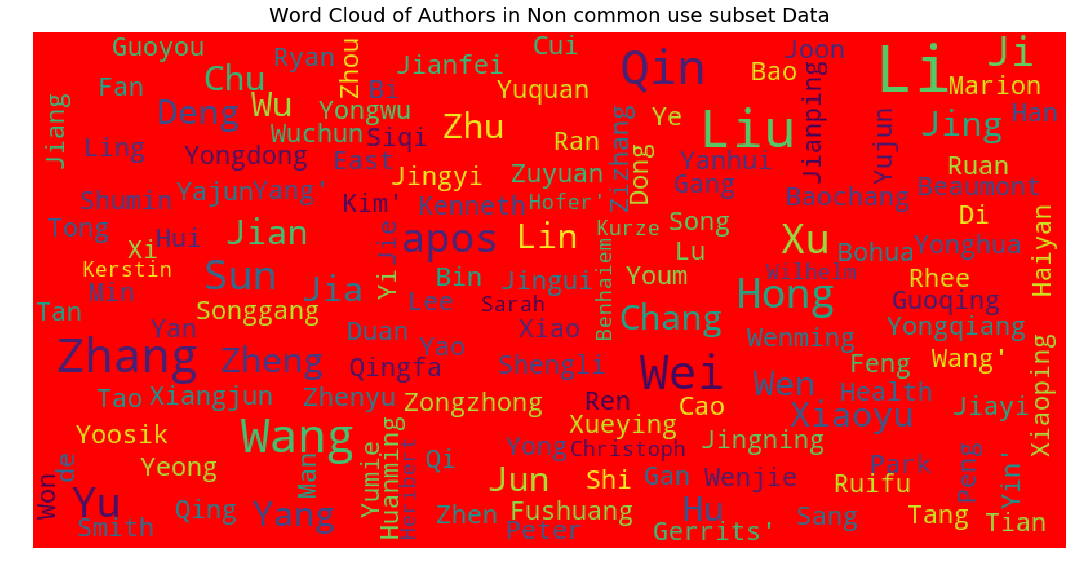

In [38]:
plot_wordcloud(noncomm_data['authors'].values, title="Word Cloud of Authors in Non common use subset Data",color = 'red')

## 2.4 Word Cloud of Authors in pmc_custom Data

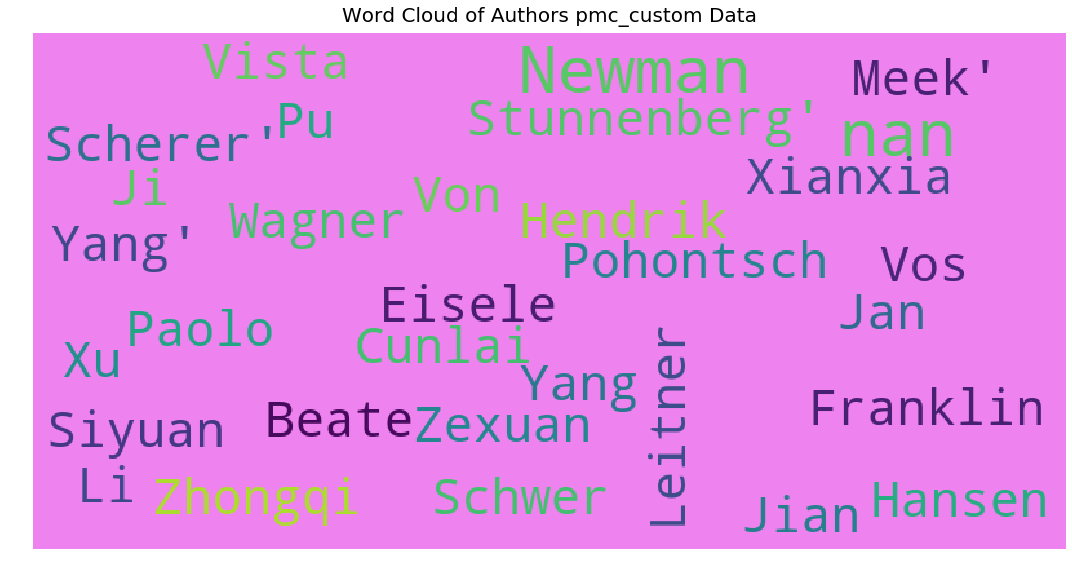

In [39]:
plot_wordcloud(pmc_data['authors'].values, title="Word Cloud of Authors pmc_custom Data",color = 'violet')

<a id='three_'></a>
# 3. Word Clouds of Affiliations

## 3.1 Word Cloud of Affiliations in biorxiv medrxiv Data

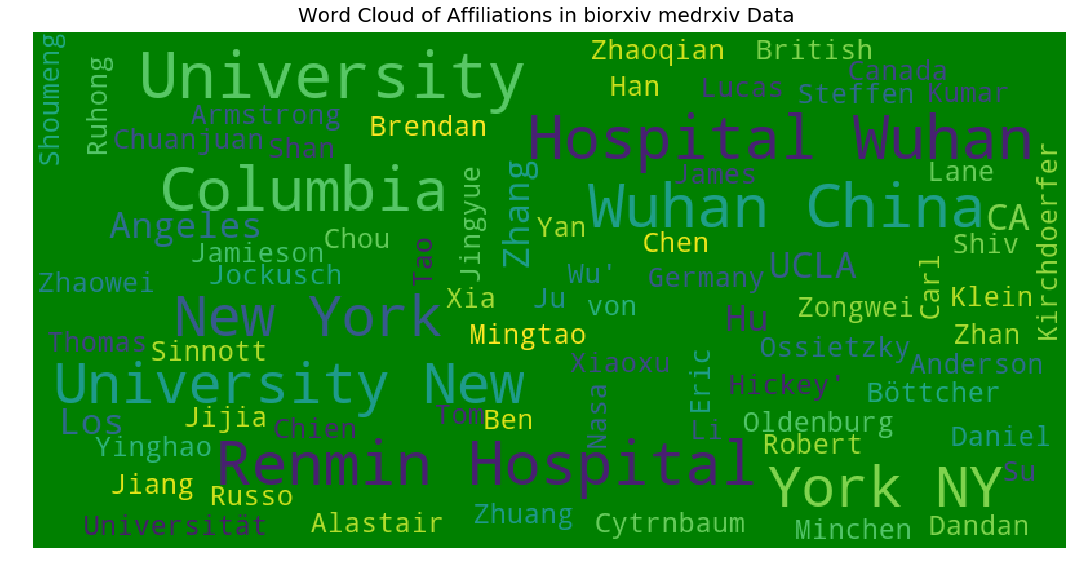

In [40]:
plot_wordcloud(biorxiv_data['affiliations'].values, title="Word Cloud of Affiliations in biorxiv medrxiv Data ",color = 'green')

## 3.2 Word Cloud of Affiliations in comm use subset Data

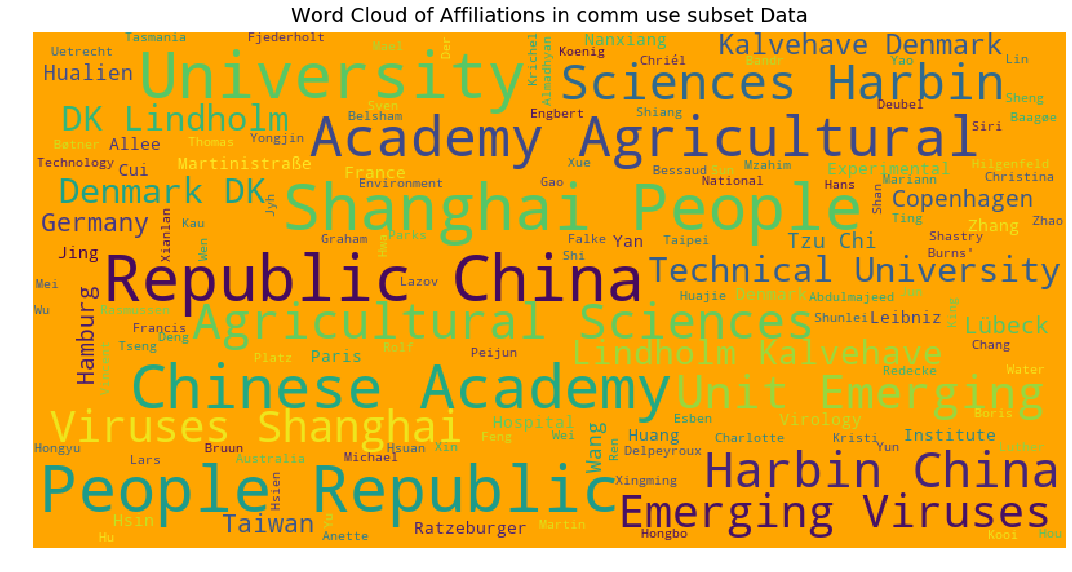

In [41]:
plot_wordcloud(comm_data['affiliations'].values, title="Word Cloud of Affiliations in comm use subset Data",color = 'orange')

## 3.3 Word Cloud of Affiliations in Non common use subset Data

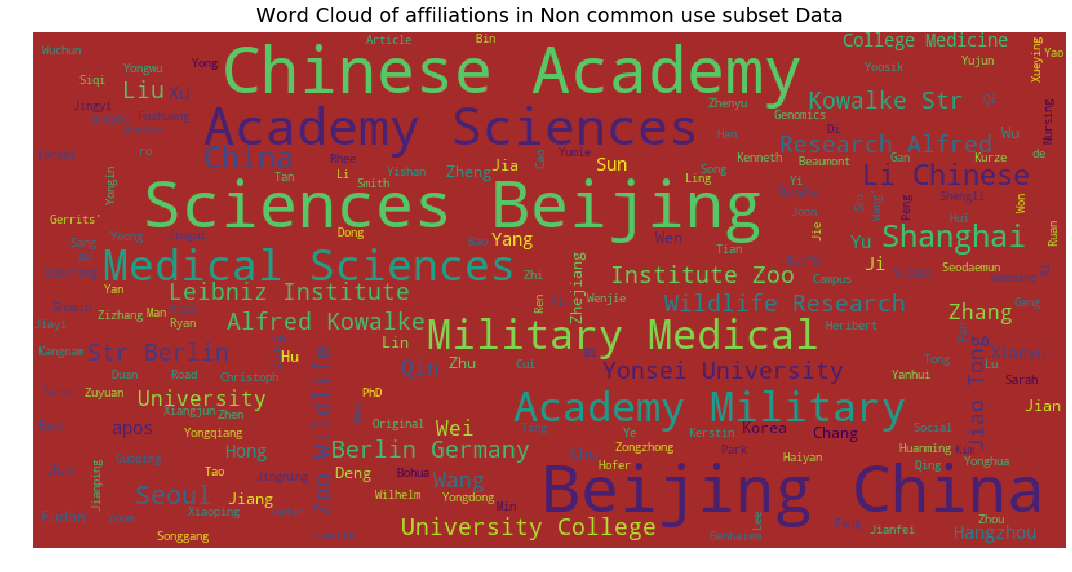

In [42]:
plot_wordcloud(noncomm_data['affiliations'].values, title="Word Cloud of affiliations in Non common use subset Data",color = 'brown')

## 3.4 Word Cloud of Affiliations in pmc_custom Data

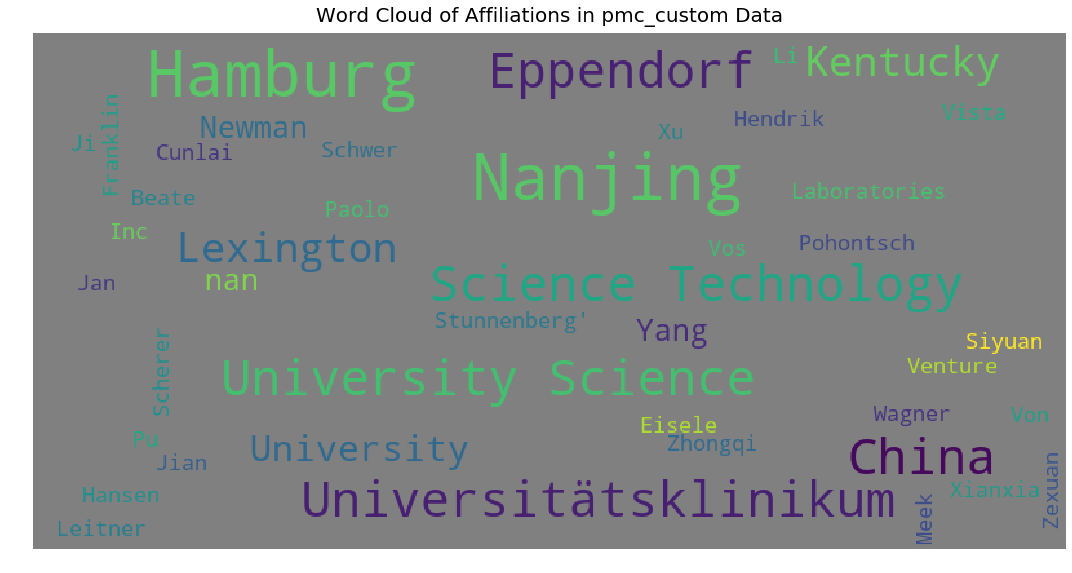

In [43]:
plot_wordcloud(pmc_data['affiliations'].values, title="Word Cloud of Affiliations in pmc_custom Data",color = 'gray')

<a id='four_'></a>
# 4. Ngram Analysis

## 4.1 Ngram Analysis of Abstracts

### 4.1.1 Word Frequency analysis of abstracts

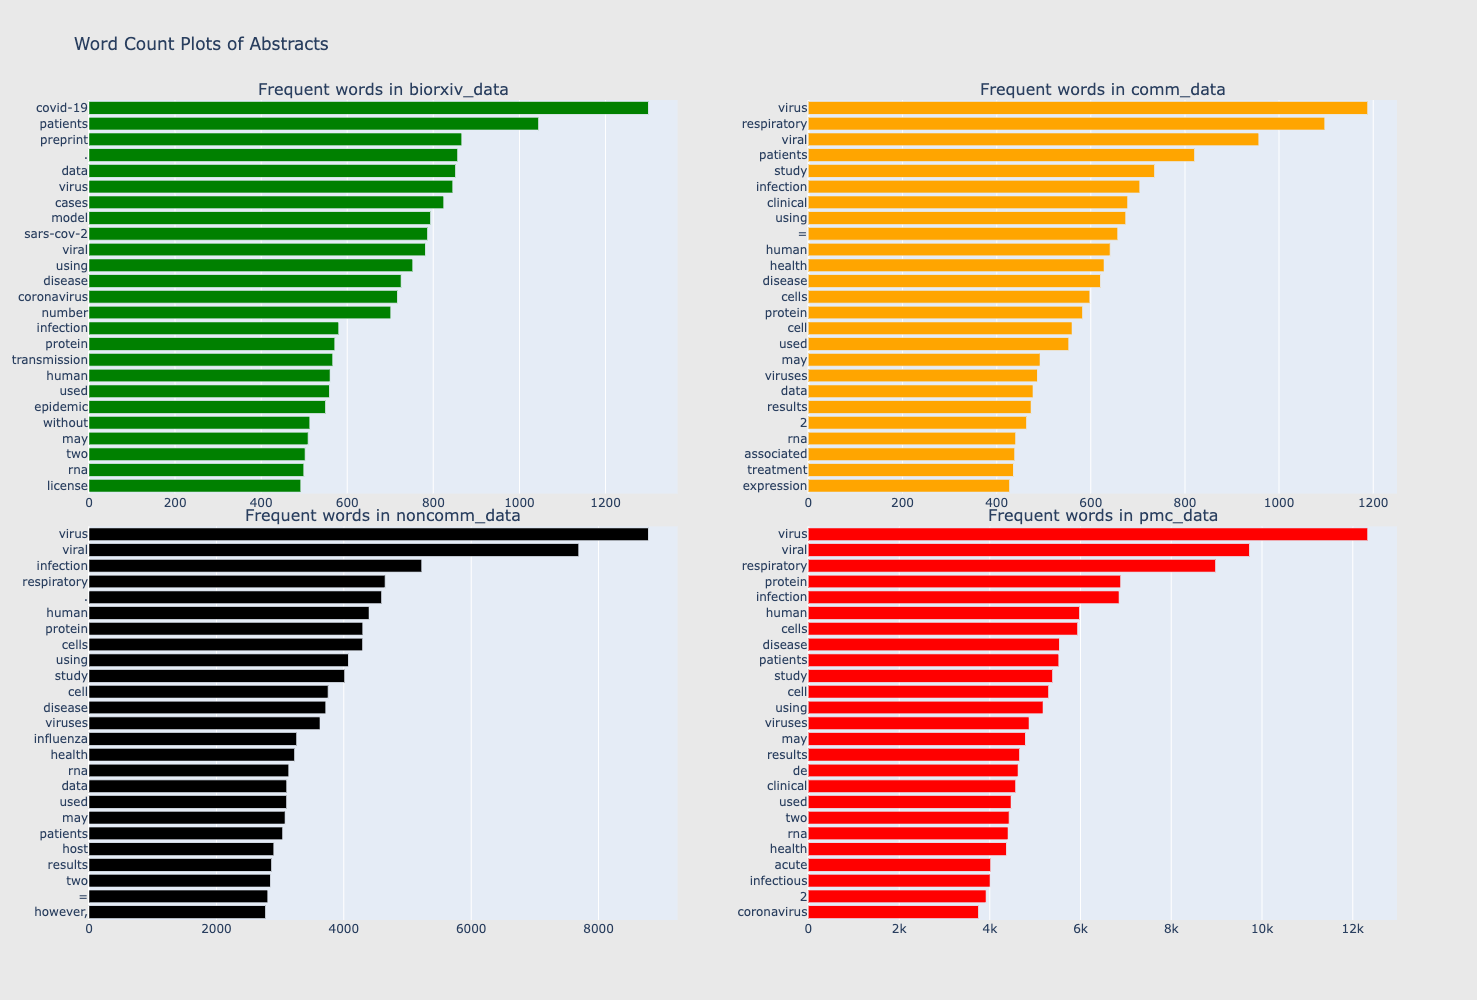

In [44]:
df1 = biorxiv_data['abstract'].dropna()
df3 = comm_data["abstract"].dropna()
df2 = noncomm_data["abstract"].dropna()
df4 = pmc_data["abstract"].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    #Reference and credits: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df1:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in df2:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'orange')

freq_dict = defaultdict(int)
for sent in df3:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'black')

freq_dict = defaultdict(int)
for sent in df4:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace3 = horizontal_bar_chart(fd_sorted.head(25), 'red')



# Creating two subplots
fig = tools.make_subplots(rows=2, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words in biorxiv_data", 
                                          "Frequent words in comm_data",
                                          "Frequent words in noncomm_data",
                                          "Frequent words in pmc_data"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)



fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots of Abstracts")
iplot(fig, filename='word-plots')


## Observations: 
* We can see from above word frequency plots most the top words consits of Virus,Respiratory,disease,Transmission etc..,

### 4.1.2 Bigram analysis of Abstracts

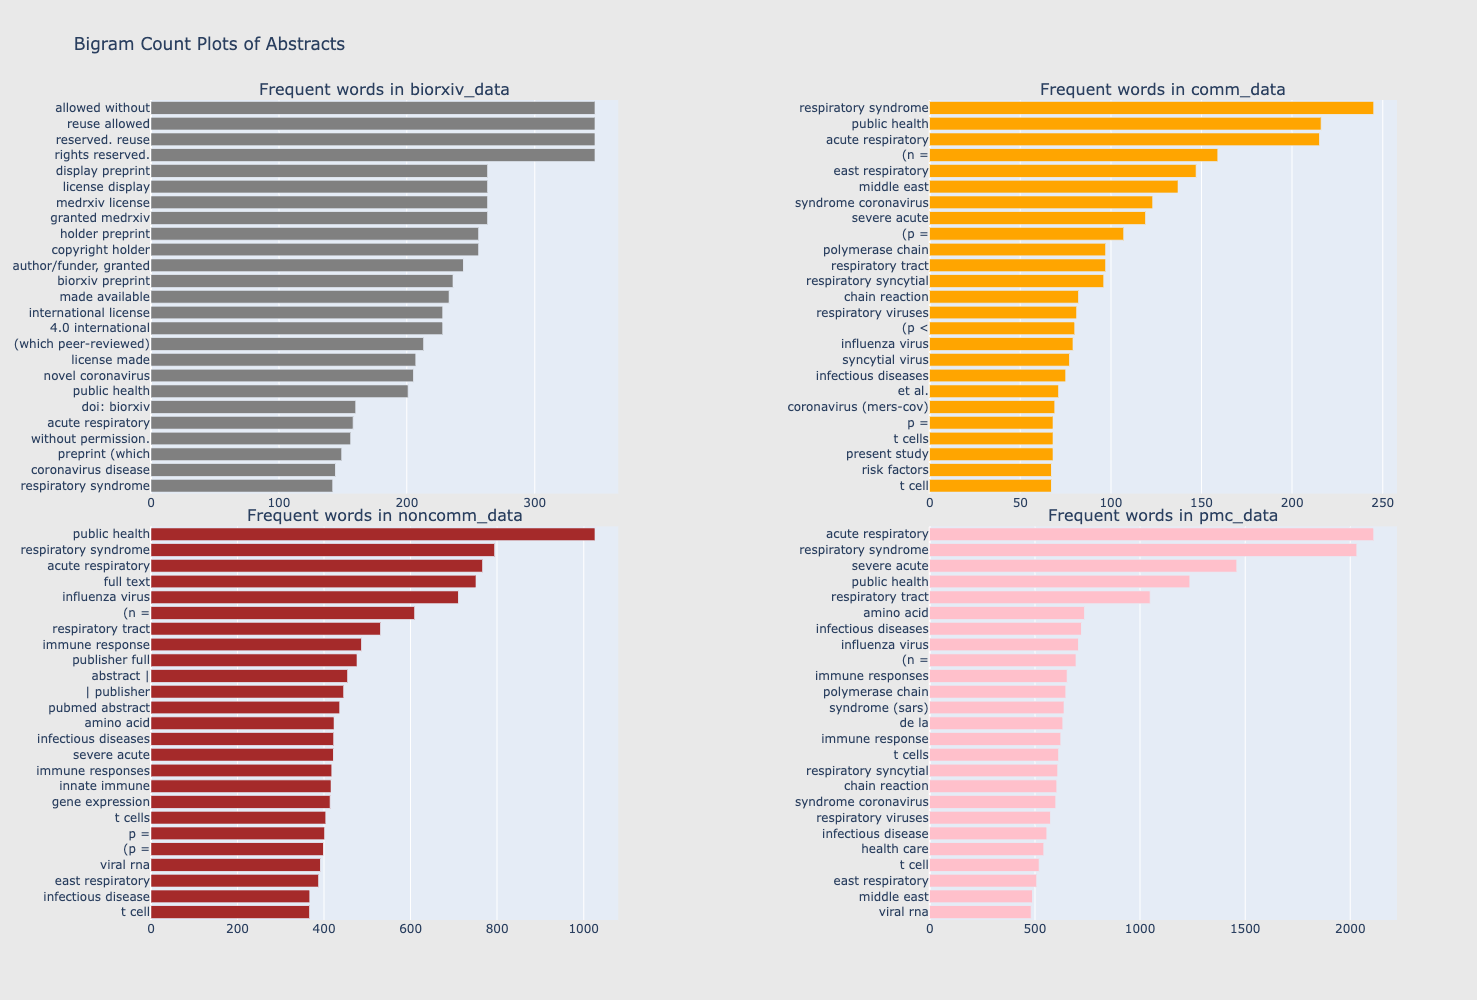

In [45]:
freq_dict = defaultdict(int)
for sent in df1:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'gray')


freq_dict = defaultdict(int)
for sent in df2:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'orange')

freq_dict = defaultdict(int)
for sent in df3:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')


freq_dict = defaultdict(int)
for sent in df4:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace3 = horizontal_bar_chart(fd_sorted.head(25), 'pink')


# Creating two subplots
fig = tools.make_subplots(rows=2, cols=2, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Frequent words in biorxiv_data", 
                                          "Frequent words in comm_data",
                                          "Frequent words in noncomm_data",
                                          "Frequent words in pmc_data"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots of Abstracts")
iplot(fig, filename='word-plots')

## Observations:
* We can observe from above bigram plot that most of words contains Respiratory syndrome as we know corona will effect our respiratory system.

### 4.1.3 Trigram analysis of Abstracts

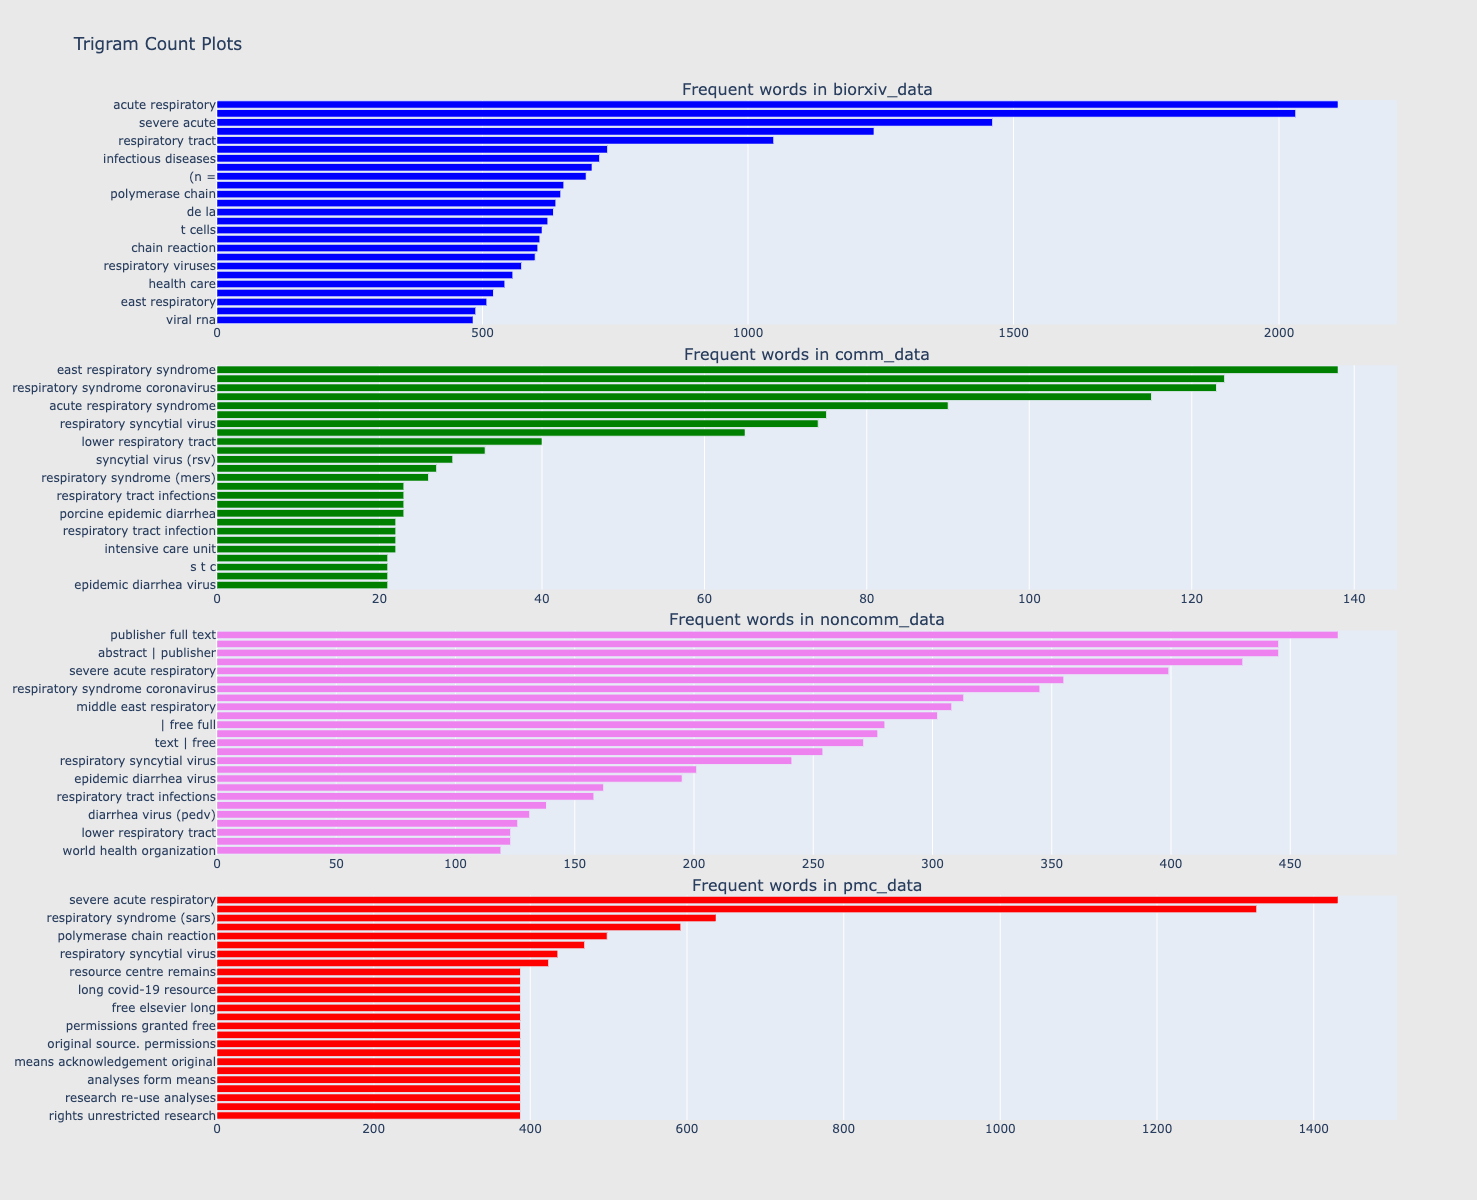

In [46]:
for sent in df1:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'blue')


freq_dict = defaultdict(int)
for sent in df2:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'green')

freq_dict = defaultdict(int)
for sent in df3:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'violet')

freq_dict = defaultdict(int)
for sent in df4:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace3 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=4, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Frequent words in biorxiv_data", 
                                          "Frequent words in comm_data",
                                          "Frequent words in noncomm_data",
                                          "Frequent words in pmc_data"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig.append_trace(trace3, 4, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

## 4.2 Ngram Analysis of Text in papers

### 4.2.1 Word frequency Plots of texts in papers

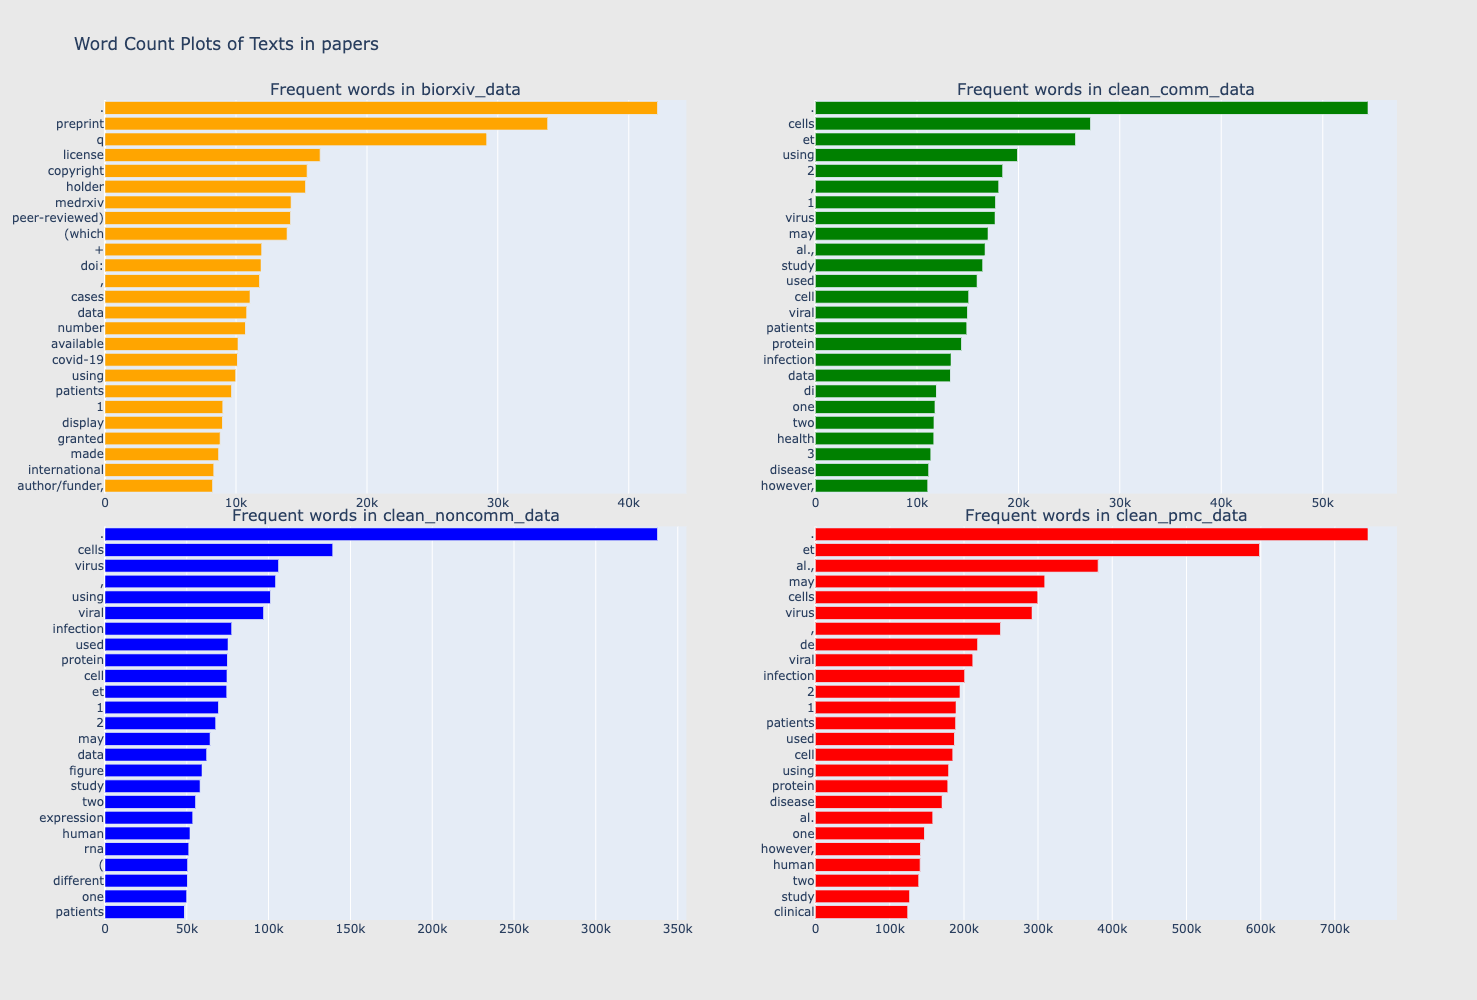

In [51]:
df1 = biorxiv_data['text'].dropna()
df3 = comm_data["text"].dropna()
df2 = noncomm_data["text"].dropna()
df4 = pmc_data["text"].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df1:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'orange')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in df2:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'green')

freq_dict = defaultdict(int)
for sent in df3:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'blue')

freq_dict = defaultdict(int)
for sent in df4:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace3 = horizontal_bar_chart(fd_sorted.head(25), 'red')



# Creating two subplots
fig = tools.make_subplots(rows=2, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words in biorxiv_data", 
                                          "Frequent words in comm_data",
                                          "Frequent words in noncomm_data",
                                          "Frequent words in pmc_data"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)



fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots of Texts in papers")
iplot(fig, filename='word-plots')


### 4.2.2 Bigram Plots of texts in papers

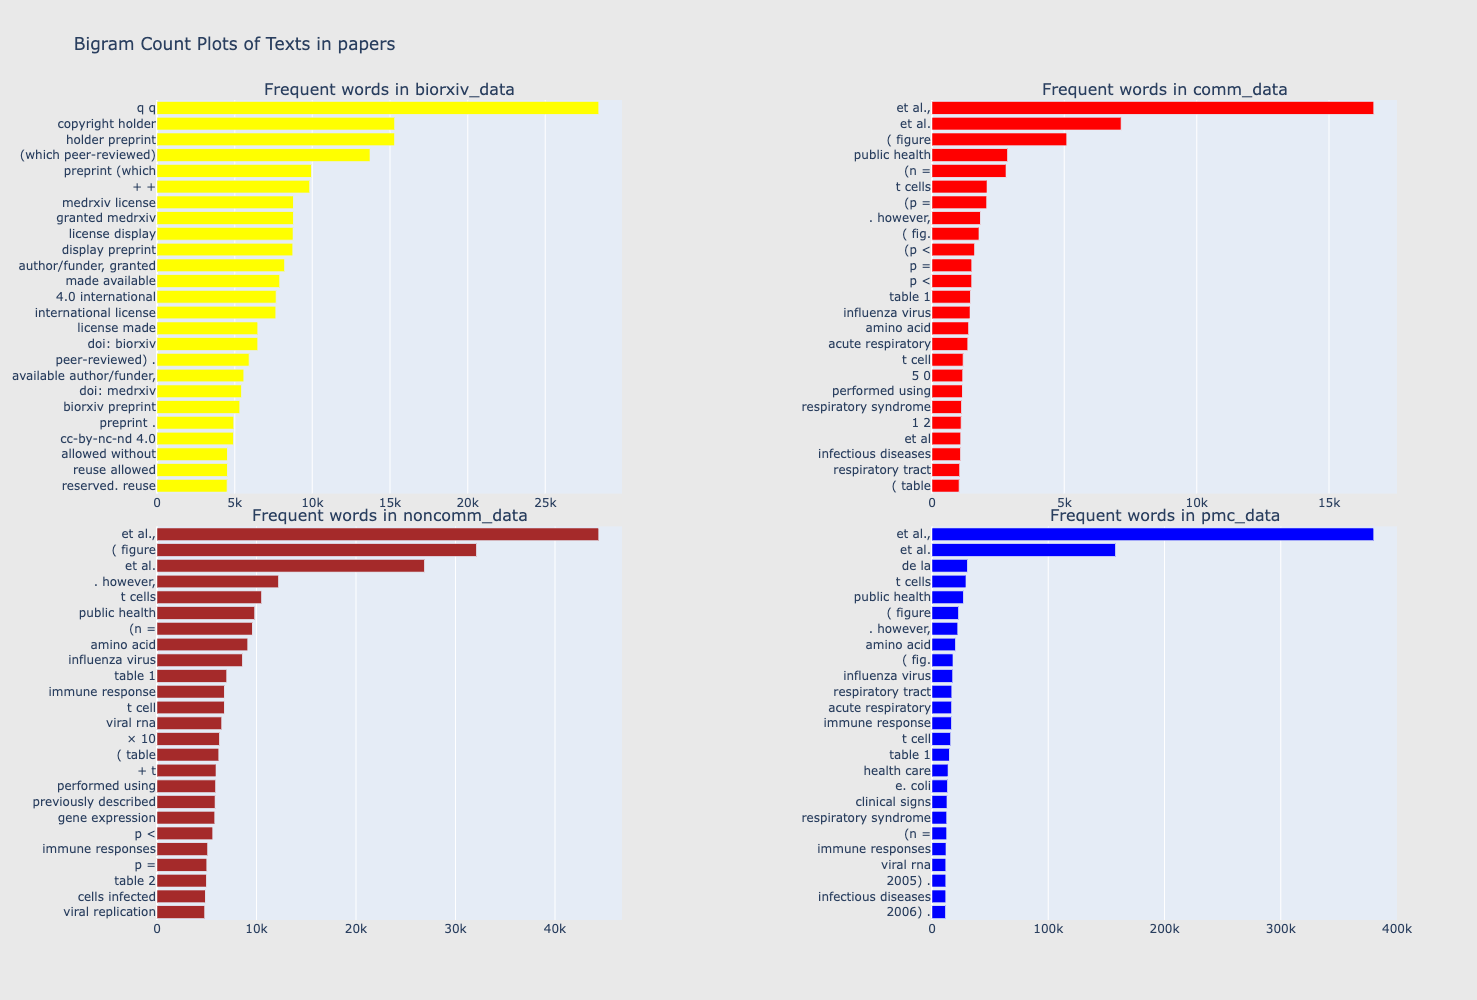

In [52]:
freq_dict = defaultdict(int)
for sent in df1:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'yellow')


freq_dict = defaultdict(int)
for sent in df2:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'red')

freq_dict = defaultdict(int)
for sent in df3:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')


freq_dict = defaultdict(int)
for sent in df4:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace3 = horizontal_bar_chart(fd_sorted.head(25), 'blue')


# Creating two subplots
fig = tools.make_subplots(rows=2, cols=2, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Frequent words in biorxiv_data", 
                                          "Frequent words in comm_data",
                                          "Frequent words in noncomm_data",
                                          "Frequent words in pmc_data"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots of Texts in papers")
iplot(fig, filename='word-plots')

### Obseravtions:
* We can observe papers text contains matter about t-cells.T cells are also called T lymphocyte, type of leukocyte (white blood cell) that is an essential part of the immune system. T cells are one of two primary types of lymphocytes—B cells being the second type—that determine the specificity of immune response to antigens (foreign substances) in the body.
* Also about Influenza Virus, commonly known as "the flu", is an infectious disease caused by an influenza virus. Symptoms can be mild to severe. The most common symptoms include: high fever, runny nose, sore throat, muscle and joint pain, headache, coughing, and feeling tired.Which are also the symptoms of Corona Virus.

# Pyspark

In [1]:
# Find path to PySpark.
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
# Import PySpark and initialize SparkContext object.

import pyspark
sc = pyspark.SparkContext()

24/05/20 13:11:56 WARN Utils: Your hostname, Nocturn.local resolves to a loopback address: 127.0.0.1; using 192.168.1.70 instead (on interface en0)
24/05/20 13:11:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


24/05/20 13:11:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
spark = pyspark.sql.SparkSession.builder.appName("CORD-19 Analysis").getOrCreate()

In [3]:
import os

In [4]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import concat, col, lit
import seaborn as sns
from pyspark.sql.types import ArrayType, StringType, StructType, StructField
import langid

## Read the dataset using spark form Hadoop

In [5]:
path = "hdfs://localhost:9000/Assessment/COVID.csv"
metadata = spark.read.load(os.path.join(path, 'metadata.csv'), format='csv', sep=',', inferSchema=True, header=True)

In [6]:
metadata_sampled = metadata.sample(withReplacement=False, fraction=0.010, seed=62)


In [7]:
metadata_sampled.limit(10).toPandas().head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,1y5nej0m,b6353f8b0fcd86c2fd1e6f27c9b18a3ccc07980b,PMC,Neutralizing Antibody Fails to Impact the Cour...,10.1371/journal.ppat.0030009,PMC1779296,17238286,cc0,Prophylaxis with high doses of neutralizing an...,2007-01-19,"Oswald, Wendelien B; Geisbert, Thomas W; Davis...",PLoS Pathog,None,None,None,document_parses/pdf_json/b6353f8b0fcd86c2fd1e6...,document_parses/pmc_json/PMC1779296.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,None
1,sabz03c0,d4f8fcc4360079a02215dd83c280e4ff2b2363be,PMC,An evaluation of Comparative Genome Sequencing...,10.1186/1471-2164-8-274,PMC2072959,17697331,cc-by,BACKGROUND: With the development of new techno...,2007-08-14,"Herring, Christopher D; Palsson, Bernhard Ø",BMC Genomics,None,None,None,document_parses/pdf_json/d4f8fcc4360079a02215d...,document_parses/pmc_json/PMC2072959.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None
2,543aq9dx,3d2962558f0a2ed4ddc00989168efe60856bd792; eed4...,PMC,Preliminary Findings of a Randomized Trial of ...,10.1371/journal.pone.0002101,PMC2364646,18461182,cc0,BACKGROUND: There are sparse data on whether n...,2008-05-07,"Cowling, Benjamin J.; Fung, Rita O. P.; Cheng,...",PLoS One,None,None,None,document_parses/pdf_json/3d2962558f0a2ed4ddc00...,document_parses/pmc_json/PMC2364646.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None
3,iy4c7404,3f6a8fc2249ec3b9bc431c5eded7f6234c75c49d,PMC,The effect of network mixing patterns on epide...,10.1098/rsif.2007.1272,PMC2386895,18055417,cc-by,"In networks, nodes may preferentially contact ...",2007-12-04,"Kiss, Istvan Z; Green, Darren M; Kao, Rowland R",J R Soc Interface,None,None,None,document_parses/pdf_json/3f6a8fc2249ec3b9bc431...,document_parses/pmc_json/PMC2386895.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None
4,7658dmvk,36fd2f3dfeec8932ec6e4553bce33222c4380756,PMC,Multiplex primer prediction software for diver...,10.1093/nar/gkp659,PMC2770652,19759213,cc-by-nc,We describe a Multiplex Primer Prediction (MPP...,2009-09-16,"Gardner, Shea N.; Hiddessen, Amy L.; Williams,...",Nucleic Acids Res,None,None,None,document_parses/pdf_json/36fd2f3dfeec8932ec6e4...,document_parses/pmc_json/PMC2770652.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None


In [8]:
metadata = metadata_sampled

In [10]:
metadata.limit(10).toPandas().head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,1y5nej0m,b6353f8b0fcd86c2fd1e6f27c9b18a3ccc07980b,PMC,Neutralizing Antibody Fails to Impact the Cour...,10.1371/journal.ppat.0030009,PMC1779296,17238286,cc0,Prophylaxis with high doses of neutralizing an...,2007-01-19,"Oswald, Wendelien B; Geisbert, Thomas W; Davis...",PLoS Pathog,None,None,None,document_parses/pdf_json/b6353f8b0fcd86c2fd1e6...,document_parses/pmc_json/PMC1779296.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,None
1,sabz03c0,d4f8fcc4360079a02215dd83c280e4ff2b2363be,PMC,An evaluation of Comparative Genome Sequencing...,10.1186/1471-2164-8-274,PMC2072959,17697331,cc-by,BACKGROUND: With the development of new techno...,2007-08-14,"Herring, Christopher D; Palsson, Bernhard Ø",BMC Genomics,None,None,None,document_parses/pdf_json/d4f8fcc4360079a02215d...,document_parses/pmc_json/PMC2072959.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None
2,543aq9dx,3d2962558f0a2ed4ddc00989168efe60856bd792; eed4...,PMC,Preliminary Findings of a Randomized Trial of ...,10.1371/journal.pone.0002101,PMC2364646,18461182,cc0,BACKGROUND: There are sparse data on whether n...,2008-05-07,"Cowling, Benjamin J.; Fung, Rita O. P.; Cheng,...",PLoS One,None,None,None,document_parses/pdf_json/3d2962558f0a2ed4ddc00...,document_parses/pmc_json/PMC2364646.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None
3,iy4c7404,3f6a8fc2249ec3b9bc431c5eded7f6234c75c49d,PMC,The effect of network mixing patterns on epide...,10.1098/rsif.2007.1272,PMC2386895,18055417,cc-by,"In networks, nodes may preferentially contact ...",2007-12-04,"Kiss, Istvan Z; Green, Darren M; Kao, Rowland R",J R Soc Interface,None,None,None,document_parses/pdf_json/3f6a8fc2249ec3b9bc431...,document_parses/pmc_json/PMC2386895.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None
4,7658dmvk,36fd2f3dfeec8932ec6e4553bce33222c4380756,PMC,Multiplex primer prediction software for diver...,10.1093/nar/gkp659,PMC2770652,19759213,cc-by-nc,We describe a Multiplex Primer Prediction (MPP...,2009-09-16,"Gardner, Shea N.; Hiddessen, Amy L.; Williams,...",Nucleic Acids Res,None,None,None,document_parses/pdf_json/36fd2f3dfeec8932ec6e4...,document_parses/pmc_json/PMC2770652.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None


In [12]:
metadata.printSchema()


root
 |-- cord_uid: string (nullable = true)
 |-- sha: string (nullable = true)
 |-- source_x: string (nullable = true)
 |-- title: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- pmcid: string (nullable = true)
 |-- pubmed_id: string (nullable = true)
 |-- license: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- journal: string (nullable = true)
 |-- mag_id: string (nullable = true)
 |-- who_covidence_id: string (nullable = true)
 |-- arxiv_id: string (nullable = true)
 |-- pdf_json_files: string (nullable = true)
 |-- pmc_json_files: string (nullable = true)
 |-- url: string (nullable = true)
 |-- s2_id: string (nullable = true)



In [13]:
metadata_sampled.count()


10469

In [14]:
from pyspark.sql.functions import year, to_date

# Convert the publish_time column to date type
metadata = metadata.withColumn("publish_date", to_date("publish_time"))

# Extract the year from the publish_date column
metadata = metadata.withColumn("publish_year", year("publish_date"))

# Drop the intermediate columns if not needed
metadata = metadata.drop("publish_time", "publish_date")

In [15]:
metadata.limit(10).toPandas().head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,publish_year
0,1y5nej0m,b6353f8b0fcd86c2fd1e6f27c9b18a3ccc07980b,PMC,Neutralizing Antibody Fails to Impact the Cour...,10.1371/journal.ppat.0030009,PMC1779296,17238286,cc0,Prophylaxis with high doses of neutralizing an...,"Oswald, Wendelien B; Geisbert, Thomas W; Davis...",PLoS Pathog,None,None,None,document_parses/pdf_json/b6353f8b0fcd86c2fd1e6...,document_parses/pmc_json/PMC1779296.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,None,2007
1,sabz03c0,d4f8fcc4360079a02215dd83c280e4ff2b2363be,PMC,An evaluation of Comparative Genome Sequencing...,10.1186/1471-2164-8-274,PMC2072959,17697331,cc-by,BACKGROUND: With the development of new techno...,"Herring, Christopher D; Palsson, Bernhard Ø",BMC Genomics,None,None,None,document_parses/pdf_json/d4f8fcc4360079a02215d...,document_parses/pmc_json/PMC2072959.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None,2007
2,543aq9dx,3d2962558f0a2ed4ddc00989168efe60856bd792; eed4...,PMC,Preliminary Findings of a Randomized Trial of ...,10.1371/journal.pone.0002101,PMC2364646,18461182,cc0,BACKGROUND: There are sparse data on whether n...,"Cowling, Benjamin J.; Fung, Rita O. P.; Cheng,...",PLoS One,None,None,None,document_parses/pdf_json/3d2962558f0a2ed4ddc00...,document_parses/pmc_json/PMC2364646.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None,2008
3,iy4c7404,3f6a8fc2249ec3b9bc431c5eded7f6234c75c49d,PMC,The effect of network mixing patterns on epide...,10.1098/rsif.2007.1272,PMC2386895,18055417,cc-by,"In networks, nodes may preferentially contact ...","Kiss, Istvan Z; Green, Darren M; Kao, Rowland R",J R Soc Interface,None,None,None,document_parses/pdf_json/3f6a8fc2249ec3b9bc431...,document_parses/pmc_json/PMC2386895.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None,2007
4,7658dmvk,36fd2f3dfeec8932ec6e4553bce33222c4380756,PMC,Multiplex primer prediction software for diver...,10.1093/nar/gkp659,PMC2770652,19759213,cc-by-nc,We describe a Multiplex Primer Prediction (MPP...,"Gardner, Shea N.; Hiddessen, Amy L.; Williams,...",Nucleic Acids Res,None,None,None,document_parses/pdf_json/36fd2f3dfeec8932ec6e4...,document_parses/pmc_json/PMC2770652.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None,2009


In [16]:
for col in ['source_x', 'publish_year', 'journal']:
    print(f'*** {col} ***')
    metadata.groupBy(col).count().show()

*** source_x ***


+--------------------+-----+
|            source_x|count|
+--------------------+-----+
|             Medline| 1368|
|                 PMC|  780|
|            Elsevier|    5|
|               ArXiv|  140|
|             BioRxiv|   31|
|                 WHO| 4392|
|             MedRxiv|   45|
|BioRxiv; Medline;...|    6|
| ArXiv; Medline; PMC|    6|
|            PMC; WHO|   48|
|          ArXiv; WHO|    5|
|        Medline; PMC| 1484|
|BioRxiv; Medline;...|    4|
|MedRxiv; Medline;...|    9|
|        Medline; WHO|  461|
|   Elsevier; Medline|    1|
|Elsevier; Medline...|  194|
|BioRxiv; Medline;...|    4|
|        MedRxiv; WHO|  156|
|MedRxiv; Medline;...|    4|
+--------------------+-----+
only showing top 20 rows

*** publish_year ***


+------------+-----+
|publish_year|count|
+------------+-----+
|        1977|    1|
|        2003|   20|
|        2007|   30|
|        2018|   77|
|        2015|   70|
|        2006|   21|
|        2022| 1232|
|        2013|   66|
|        null|  297|
|        1988|    2|
|        1994|    6|
|        2014|   62|
|        2019|   89|
|        2004|   31|
|        1967|    1|
|        1982|    1|
|        1989|    2|
|        1996|    4|
|        1998|    5|
|        2020| 3552|
+------------+-----+
only showing top 20 rows

*** journal ***


+--------------------+-----+
|             journal|count|
+--------------------+-----+
|      JAMA Netw Open|   17|
|         STAR Protoc|    2|
|      J Int Bus Stud|    1|
|          Inter Econ|    2|
|   Control Manag Rev|    2|
|Environ Sci Pollu...|    8|
|Micro and Nano Sy...|    1|
|          Reprod Sci|    2|
|Journal of diabet...|    1|
|FASEB journal : o...|    2|
| Clinical laboratory|    1|
| Nat Rev Dis Primers|    1|
|Rev Agric Food En...|    1|
|Rechtsmedizin (Berl)|    1|
|        BJPsych Open|    8|
|              Trials|    9|
|   Aging (Albany NY)|   11|
|Textbook of Addic...|    1|
|   Mediators Inflamm|    2|
|         J Vasc Nurs|    1|
+--------------------+-----+
only showing top 20 rows



In [17]:
metadata.printSchema()


root
 |-- cord_uid: string (nullable = true)
 |-- sha: string (nullable = true)
 |-- source_x: string (nullable = true)
 |-- title: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- pmcid: string (nullable = true)
 |-- pubmed_id: string (nullable = true)
 |-- license: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- journal: string (nullable = true)
 |-- mag_id: string (nullable = true)
 |-- who_covidence_id: string (nullable = true)
 |-- arxiv_id: string (nullable = true)
 |-- pdf_json_files: string (nullable = true)
 |-- pmc_json_files: string (nullable = true)
 |-- url: string (nullable = true)
 |-- s2_id: string (nullable = true)
 |-- publish_year: integer (nullable = true)



In [18]:
from pyspark.sql import functions as F
for col in ['sha', 'source_x', 'title', 'doi', 'abstract', 'publish_year', 'authors', 'journal']:
  print("Count of nulls in",col, metadata.where(F.col(col).isNull()).count())

Count of nulls in sha 6770


Count of nulls in source_x 0


Count of nulls in title 6


Count of nulls in doi 3868


Count of nulls in abstract 2252


Count of nulls in publish_year 297


Count of nulls in authors 227


Count of nulls in journal 837


In [19]:
for col in ['sha', 'source_x', 'title', 'doi', 'abstract', 'publish_year', 'authors', 'journal']:
    print(f'*** {col} ***')
    metadata.select(F.count(col), F.countDistinct(col)).show()

*** sha ***


+----------+-------------------+
|count(sha)|count(DISTINCT sha)|
+----------+-------------------+
|      3699|               3699|
+----------+-------------------+

*** source_x ***


+---------------+------------------------+
|count(source_x)|count(DISTINCT source_x)|
+---------------+------------------------+
|          10469|                      34|
+---------------+------------------------+

*** title ***


+------------+---------------------+
|count(title)|count(DISTINCT title)|
+------------+---------------------+
|       10463|                10434|
+------------+---------------------+

*** doi ***


+----------+-------------------+
|count(doi)|count(DISTINCT doi)|
+----------+-------------------+
|      6601|               6601|
+----------+-------------------+

*** abstract ***


+---------------+------------------------+
|count(abstract)|count(DISTINCT abstract)|
+---------------+------------------------+
|           8217|                    8190|
+---------------+------------------------+

*** publish_year ***


+-------------------+----------------------------+
|count(publish_year)|count(DISTINCT publish_year)|
+-------------------+----------------------------+
|              10172|                          47|
+-------------------+----------------------------+

*** authors ***


+--------------+-----------------------+
|count(authors)|count(DISTINCT authors)|
+--------------+-----------------------+
|         10242|                  10097|
+--------------+-----------------------+

*** journal ***


+--------------+-----------------------+
|count(journal)|count(DISTINCT journal)|
+--------------+-----------------------+
|          9632|                   5503|
+--------------+-----------------------+



In [20]:
metadata.printSchema()

root
 |-- cord_uid: string (nullable = true)
 |-- sha: string (nullable = true)
 |-- source_x: string (nullable = true)
 |-- title: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- pmcid: string (nullable = true)
 |-- pubmed_id: string (nullable = true)
 |-- license: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- journal: string (nullable = true)
 |-- mag_id: string (nullable = true)
 |-- who_covidence_id: string (nullable = true)
 |-- arxiv_id: string (nullable = true)
 |-- pdf_json_files: string (nullable = true)
 |-- pmc_json_files: string (nullable = true)
 |-- url: string (nullable = true)
 |-- s2_id: string (nullable = true)
 |-- publish_year: integer (nullable = true)



In [21]:
metadata.count()

10469

## Preparation and Cleaning the data

keeping only english documents

In [22]:
def detect_language_udf(text):
    if text is None:
        return ''
    if text == '':
        return ''
    lang, confidence = langid.classify(text)
    if lang == None:
        return ''
    return lang
udf_detect_language = udf(detect_language_udf, StringType())

metadata = metadata.withColumn('doc_lang', udf_detect_language(metadata.title))

In [23]:
metadata.limit(10).toPandas().head()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,publish_year,doc_lang
0,1y5nej0m,b6353f8b0fcd86c2fd1e6f27c9b18a3ccc07980b,PMC,Neutralizing Antibody Fails to Impact the Cour...,10.1371/journal.ppat.0030009,PMC1779296,17238286,cc0,Prophylaxis with high doses of neutralizing an...,"Oswald, Wendelien B; Geisbert, Thomas W; Davis...",PLoS Pathog,None,None,None,document_parses/pdf_json/b6353f8b0fcd86c2fd1e6...,document_parses/pmc_json/PMC1779296.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,None,2007,en
1,sabz03c0,d4f8fcc4360079a02215dd83c280e4ff2b2363be,PMC,An evaluation of Comparative Genome Sequencing...,10.1186/1471-2164-8-274,PMC2072959,17697331,cc-by,BACKGROUND: With the development of new techno...,"Herring, Christopher D; Palsson, Bernhard Ø",BMC Genomics,None,None,None,document_parses/pdf_json/d4f8fcc4360079a02215d...,document_parses/pmc_json/PMC2072959.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None,2007,en
2,543aq9dx,3d2962558f0a2ed4ddc00989168efe60856bd792; eed4...,PMC,Preliminary Findings of a Randomized Trial of ...,10.1371/journal.pone.0002101,PMC2364646,18461182,cc0,BACKGROUND: There are sparse data on whether n...,"Cowling, Benjamin J.; Fung, Rita O. P.; Cheng,...",PLoS One,None,None,None,document_parses/pdf_json/3d2962558f0a2ed4ddc00...,document_parses/pmc_json/PMC2364646.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None,2008,en
3,iy4c7404,3f6a8fc2249ec3b9bc431c5eded7f6234c75c49d,PMC,The effect of network mixing patterns on epide...,10.1098/rsif.2007.1272,PMC2386895,18055417,cc-by,"In networks, nodes may preferentially contact ...","Kiss, Istvan Z; Green, Darren M; Kao, Rowland R",J R Soc Interface,None,None,None,document_parses/pdf_json/3f6a8fc2249ec3b9bc431...,document_parses/pmc_json/PMC2386895.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None,2007,en
4,7658dmvk,36fd2f3dfeec8932ec6e4553bce33222c4380756,PMC,Multiplex primer prediction software for diver...,10.1093/nar/gkp659,PMC2770652,19759213,cc-by-nc,We describe a Multiplex Primer Prediction (MPP...,"Gardner, Shea N.; Hiddessen, Amy L.; Williams,...",Nucleic Acids Res,None,None,None,document_parses/pdf_json/36fd2f3dfeec8932ec6e4...,document_parses/pmc_json/PMC2770652.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,None,2009,en


In [24]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
import langid


In [25]:
metadata = metadata.filter(col("doc_lang").contains('en'))

In [26]:
metadata.count()

9906

In [27]:
metadata = metadata.dropna(subset=["abstract"])
metadata = metadata.dropna(subset=["authors"])

In [28]:
metadata.count()

7848

In [29]:
metadata = metadata.select(['sha', 'source_x', 'title', 'abstract', 'authors', 'publish_year', 'doc_lang'])

In [30]:
from pyspark.sql.functions import col, expr

metadata = metadata.filter(col('title').isNotNull() & (col('title') != ''))

In [31]:
metadata.printSchema()

root
 |-- sha: string (nullable = true)
 |-- source_x: string (nullable = true)
 |-- title: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- publish_year: integer (nullable = true)
 |-- doc_lang: string (nullable = true)



In [32]:
metadata.limit(10).toPandas().head()

,sha,source_x,title,abstract,authors,publish_year,doc_lang
0,b6353f8b0fcd86c2fd1e6f27c9b18a3ccc07980b,PMC,Neutralizing Antibody Fails to Impact the Cour...,Prophylaxis with high doses of neutralizing an...,"Oswald, Wendelien B; Geisbert, Thomas W; Davis...",2007,en
1,d4f8fcc4360079a02215dd83c280e4ff2b2363be,PMC,An evaluation of Comparative Genome Sequencing...,BACKGROUND: With the development of new techno...,"Herring, Christopher D; Palsson, Bernhard Ø",2007,en
2,3d2962558f0a2ed4ddc00989168efe60856bd792; eed4...,PMC,Preliminary Findings of a Randomized Trial of ...,BACKGROUND: There are sparse data on whether n...,"Cowling, Benjamin J.; Fung, Rita O. P.; Cheng,...",2008,en
3,3f6a8fc2249ec3b9bc431c5eded7f6234c75c49d,PMC,The effect of network mixing patterns on epide...,"In networks, nodes may preferentially contact ...","Kiss, Istvan Z; Green, Darren M; Kao, Rowland R",2007,en
4,36fd2f3dfeec8932ec6e4553bce33222c4380756,PMC,Multiplex primer prediction software for diver...,We describe a Multiplex Primer Prediction (MPP...,"Gardner, Shea N.; Hiddessen, Amy L.; Williams,...",2009,en


## Removing Stop Words


In [35]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover
from pyspark.sql.functions import lower

In [36]:
# Define custom stop words
custom_stop_words = [ 'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure','rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI', 'www']
lower_custom_stop_words = list(map(str.lower, custom_stop_words))

# Define the stages of the pipeline

# To lower
metadata.withColumn('title', lower(col('title')))
metadata.withColumn('abstract', lower(col('abstract')))
metadata.withColumn('authors', lower(col('authors')))

# Tokenizer
tokenize_title = RegexTokenizer(inputCol="title", outputCol="title_tok", pattern='\\W')
tokenize_abstract = RegexTokenizer(inputCol="abstract", outputCol="abstract_tok", pattern='\\W')
tokenize_authors = RegexTokenizer(inputCol="authors", outputCol="authors_tok", pattern='\\W')
# Removing stop words and custom stop words
stopwords_remover_title = StopWordsRemover(inputCol="title_tok", outputCol="title_stop", stopWords=StopWordsRemover().getStopWords() + lower_custom_stop_words)
stopwords_remover_abstract = StopWordsRemover(inputCol="abstract_tok", outputCol="abstract_stop", stopWords=StopWordsRemover().getStopWords() + lower_custom_stop_words)
stopwords_remover_authors = StopWordsRemover(inputCol="authors_tok", outputCol="authors_stop", stopWords=StopWordsRemover().getStopWords() + lower_custom_stop_words)

24/05/20 13:20:01 WARN StopWordsRemover: Default locale set was [en_NP]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.
24/05/20 13:20:01 WARN StopWordsRemover: Default locale set was [en_NP]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.
24/05/20 13:20:01 WARN StopWordsRemover: Default locale set was [en_NP]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.
24/05/20 13:20:01 WARN StopWordsRemover: Default locale set was [en_NP]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.
24/05/20 13:20:01 WARN StopWordsRemover: Default locale set was [en_NP]; however, it was not found in available locales in JVM, falling back to en_U

In [37]:
# Create the pipeline
pipeline = Pipeline(stages=[tokenize_title, tokenize_abstract, tokenize_authors, stopwords_remover_title, stopwords_remover_abstract, stopwords_remover_authors])

# Fit the pipeline to the DataFrame
pipeline_model = pipeline.fit(metadata)

# Transform the DataFrame
metadata4 = pipeline_model.transform(metadata)

metadata4.limit(10).toPandas().head()

,sha,source_x,title,abstract,authors,publish_year,doc_lang,title_tok,abstract_tok,authors_tok,title_stop,abstract_stop,authors_stop
0,b6353f8b0fcd86c2fd1e6f27c9b18a3ccc07980b,PMC,Neutralizing Antibody Fails to Impact the Cour...,Prophylaxis with high doses of neutralizing an...,"Oswald, Wendelien B; Geisbert, Thomas W; Davis...",2007,en,"[neutralizing, antibody, fails, to, impact, th...","[prophylaxis, with, high, doses, of, neutraliz...","[oswald, wendelien, b, geisbert, thomas, w, da...","[neutralizing, antibody, fails, impact, course...","[prophylaxis, high, doses, neutralizing, antib...","[oswald, wendelien, b, geisbert, thomas, w, da..."
1,d4f8fcc4360079a02215dd83c280e4ff2b2363be,PMC,An evaluation of Comparative Genome Sequencing...,BACKGROUND: With the development of new techno...,"Herring, Christopher D; Palsson, Bernhard Ø",2007,en,"[an, evaluation, of, comparative, genome, sequ...","[background, with, the, development, of, new, ...","[herring, christopher, d, palsson, bernhard]","[evaluation, comparative, genome, sequencing, ...","[background, development, new, technology, rec...","[herring, christopher, d, palsson, bernhard]"
2,3d2962558f0a2ed4ddc00989168efe60856bd792; eed4...,PMC,Preliminary Findings of a Randomized Trial of ...,BACKGROUND: There are sparse data on whether n...,"Cowling, Benjamin J.; Fung, Rita O. P.; Cheng,...",2008,en,"[preliminary, findings, of, a, randomized, tri...","[background, there, are, sparse, data, on, whe...","[cowling, benjamin, j, fung, rita, o, p, cheng...","[preliminary, findings, randomized, trial, non...","[background, sparse, data, whether, non, pharm...","[cowling, benjamin, j, fung, rita, o, p, cheng..."
3,3f6a8fc2249ec3b9bc431c5eded7f6234c75c49d,PMC,The effect of network mixing patterns on epide...,"In networks, nodes may preferentially contact ...","Kiss, Istvan Z; Green, Darren M; Kao, Rowland R",2007,en,"[the, effect, of, network, mixing, patterns, o...","[in, networks, nodes, may, preferentially, con...","[kiss, istvan, z, green, darren, m, kao, rowla...","[effect, network, mixing, patterns, epidemic, ...","[networks, nodes, may, preferentially, contact...","[kiss, istvan, z, green, darren, m, kao, rowla..."
4,36fd2f3dfeec8932ec6e4553bce33222c4380756,PMC,Multiplex primer prediction software for diver...,We describe a Multiplex Primer Prediction (MPP...,"Gardner, Shea N.; Hiddessen, Amy L.; Williams,...",2009,en,"[multiplex, primer, prediction, software, for,...","[we, describe, a, multiplex, primer, predictio...","[gardner, shea, n, hiddessen, amy, l, williams...","[multiplex, primer, prediction, software, dive...","[describe, multiplex, primer, prediction, mpp,...","[gardner, shea, n, hiddessen, amy, l, williams..."


In [38]:
nostopwords_metadata = metadata4

In [39]:
nostopwords_metadata.printSchema()


root
 |-- sha: string (nullable = true)
 |-- source_x: string (nullable = true)
 |-- title: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- publish_year: integer (nullable = true)
 |-- doc_lang: string (nullable = true)
 |-- title_tok: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- abstract_tok: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- authors_tok: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- title_stop: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- abstract_stop: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- authors_stop: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [40]:
metadata = nostopwords_metadata.select(['sha', 'source_x', 'title_stop', 
                                         'abstract_stop', 'authors_stop', 'publish_year', 'doc_lang'])

In [41]:
metadata.printSchema()


root
 |-- sha: string (nullable = true)
 |-- source_x: string (nullable = true)
 |-- title_stop: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- abstract_stop: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- authors_stop: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- publish_year: integer (nullable = true)
 |-- doc_lang: string (nullable = true)



In [41]:
metadata.limit(5).toPandas().head()

,sha,source_x,title_stop,abstract_stop,authors_stop,publish_year,doc_lang
0,b6353f8b0fcd86c2fd1e6f27c9b18a3ccc07980b,PMC,"[neutralizing, antibody, fails, impact, course...","[prophylaxis, high, doses, neutralizing, antib...","[oswald, wendelien, b, geisbert, thomas, w, da...",2007,en
1,d4f8fcc4360079a02215dd83c280e4ff2b2363be,PMC,"[evaluation, comparative, genome, sequencing, ...","[background, development, new, technology, rec...","[herring, christopher, d, palsson, bernhard]",2007,en
2,3d2962558f0a2ed4ddc00989168efe60856bd792; eed4...,PMC,"[preliminary, findings, randomized, trial, non...","[background, sparse, data, whether, non, pharm...","[cowling, benjamin, j, fung, rita, o, p, cheng...",2008,en
3,3f6a8fc2249ec3b9bc431c5eded7f6234c75c49d,PMC,"[effect, network, mixing, patterns, epidemic, ...","[networks, nodes, may, preferentially, contact...","[kiss, istvan, z, green, darren, m, kao, rowla...",2007,en
4,36fd2f3dfeec8932ec6e4553bce33222c4380756,PMC,"[multiplex, primer, prediction, software, dive...","[describe, multiplex, primer, prediction, mpp,...","[gardner, shea, n, hiddessen, amy, l, williams...",2009,en


In [42]:
from pyspark.sql import functions as F

In [43]:
metadata = metadata.withColumn('doc', F.concat(F.col('title_stop') ,F.col('abstract_stop'), F.col('authors_stop')))


In [44]:
for col in ['sha', 'source_x', 'doc', 'publish_year', 'doc_lang']:
  print("Count of nulls in",col, metadata.where(F.col(col).isNull()).count())

Count of nulls in sha 4689


Count of nulls in source_x 0


Count of nulls in doc 0


Count of nulls in publish_year 283


Count of nulls in doc_lang 0


In [46]:
pd_df = metadata.toPandas()

In [47]:
pd_df

,sha,source_x,title_stop,abstract_stop,authors_stop,publish_year,doc_lang,doc
0,b6353f8b0fcd86c2fd1e6f27c9b18a3ccc07980b,PMC,"[neutralizing, antibody, fails, impact, course...","[prophylaxis, high, doses, neutralizing, antib...","[oswald, wendelien, b, geisbert, thomas, w, da...",2007.0,en,"[neutralizing, antibody, fails, impact, course..."
1,d4f8fcc4360079a02215dd83c280e4ff2b2363be,PMC,"[evaluation, comparative, genome, sequencing, ...","[background, development, new, technology, rec...","[herring, christopher, d, palsson, bernhard]",2007.0,en,"[evaluation, comparative, genome, sequencing, ..."
2,3d2962558f0a2ed4ddc00989168efe60856bd792; eed4...,PMC,"[preliminary, findings, randomized, trial, non...","[background, sparse, data, whether, non, pharm...","[cowling, benjamin, j, fung, rita, o, p, cheng...",2008.0,en,"[preliminary, findings, randomized, trial, non..."
3,3f6a8fc2249ec3b9bc431c5eded7f6234c75c49d,PMC,"[effect, network, mixing, patterns, epidemic, ...","[networks, nodes, may, preferentially, contact...","[kiss, istvan, z, green, darren, m, kao, rowla...",2007.0,en,"[effect, network, mixing, patterns, epidemic, ..."
4,36fd2f3dfeec8932ec6e4553bce33222c4380756,PMC,"[multiplex, primer, prediction, software, dive...","[describe, multiplex, primer, prediction, mpp,...","[gardner, shea, n, hiddessen, amy, l, williams...",2009.0,en,"[multiplex, primer, prediction, software, dive..."
...,...,...,...,...,...,...,...,...
7843,b545ad1fab363bde46648e44902274e9475d967b,Medline; PMC,"[managing, patient, flows, radiation, oncology...","[purpose, described, work, aimed, avoid, cance...","[akuamoa, boateng, dennis, wegen, simone, ferd...",2020.0,en,"[managing, patient, flows, radiation, oncology..."
7844,None,Medline; WHO,"[surface, ligand, induced, crystallographic, d...","[crystallisation, nanomaterials, assembly, bas...","[park, bum, chul, ko, min, jun, kim, young, kw...",2022.0,en,"[surface, ligand, induced, crystallographic, d..."
7845,5b51f12bad76fa5e2ff5b33a3d43bca11dfa7cf0,Medline; PMC,"[spontaneous, subcutaneous, emphysema, pneumom...","[case, series, patients, male, 36, year, old, ...","[azzawi, mohammed, douedi, steven, alshami, ab...",2020.0,en,"[spontaneous, subcutaneous, emphysema, pneumom..."
7846,4e8e95e612c3d626320411246eaf2f3310202824,Medline; PMC,"[influence, habitat, viral, diversity, neotrop...","[rodents, important, reservoirs, numerous, vir...","[tirera, sourakhata, de, thoisy, benoit, donat...",2021.0,en,"[influence, habitat, viral, diversity, neotrop..."


## Vectorization

In [45]:
metadata.limit(5).toPandas().head()

,sha,source_x,title_stop,abstract_stop,authors_stop,publish_year,doc_lang,doc
0,b6353f8b0fcd86c2fd1e6f27c9b18a3ccc07980b,PMC,"[neutralizing, antibody, fails, impact, course...","[prophylaxis, high, doses, neutralizing, antib...","[oswald, wendelien, b, geisbert, thomas, w, da...",2007,en,"[neutralizing, antibody, fails, impact, course..."
1,d4f8fcc4360079a02215dd83c280e4ff2b2363be,PMC,"[evaluation, comparative, genome, sequencing, ...","[background, development, new, technology, rec...","[herring, christopher, d, palsson, bernhard]",2007,en,"[evaluation, comparative, genome, sequencing, ..."
2,3d2962558f0a2ed4ddc00989168efe60856bd792; eed4...,PMC,"[preliminary, findings, randomized, trial, non...","[background, sparse, data, whether, non, pharm...","[cowling, benjamin, j, fung, rita, o, p, cheng...",2008,en,"[preliminary, findings, randomized, trial, non..."
3,3f6a8fc2249ec3b9bc431c5eded7f6234c75c49d,PMC,"[effect, network, mixing, patterns, epidemic, ...","[networks, nodes, may, preferentially, contact...","[kiss, istvan, z, green, darren, m, kao, rowla...",2007,en,"[effect, network, mixing, patterns, epidemic, ..."
4,36fd2f3dfeec8932ec6e4553bce33222c4380756,PMC,"[multiplex, primer, prediction, software, dive...","[describe, multiplex, primer, prediction, mpp,...","[gardner, shea, n, hiddessen, amy, l, williams...",2009,en,"[multiplex, primer, prediction, software, dive..."


In [46]:
metadata.count()

7848

In [49]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as pl

# Vectorization using gensim's Word2Vec
documents = pd_df['doc'].tolist()
model_w2v = Word2Vec(sentences=documents, vector_size=100, min_count=10, workers=4)
pd_df['embeddings'] = pd_df['doc'].apply(lambda x: np.mean([model_w2v.wv[word] for word in x if word in model_w2v.wv], axis=0))

# Checking for null values
for col in ['source_x', 'publish_year', 'doc_lang']:
    print("Count of nulls in", col, pd_df[col].isnull().sum())

# Filling missing values
pd_df = pd_df.fillna('unknown')

for col in ['source_x', 'publish_year', 'doc_lang']:
    print("Count of nulls in", col, pd_df[col].isnull().sum())



Count of nulls in source_x 0
Count of nulls in publish_year 0
Count of nulls in doc_lang 0
Count of nulls in source_x 0
Count of nulls in publish_year 0
Count of nulls in doc_lang 0


In [60]:
# String Indexing and One-Hot Encoding
cat_cols = ['source_x', 'doc_lang']
pd_df[cat_cols] = pd_df[cat_cols].astype(str)  # Ensure the columns are strings


label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    pd_df[col + '_index'] = le.fit_transform(pd_df[col])
    label_encoders[col] = le

one_hot_encoders = {}
for col in cat_cols:
    ohe = OneHotEncoder(sparse_output=False)
    encoded = ohe.fit_transform(pd_df[[col + '_index']])
    encoded_df = pd.DataFrame(encoded, columns=[col + '_encoded_' + str(i) for i in range(encoded.shape[1])])
    pd_df = pd.concat([pd_df, encoded_df], axis=1)
    one_hot_encoders[col] = ohe

# Vector Assembler equivalent
required_features = ['embeddings'] + [col + '_encoded_' + str(i) for col in cat_cols for i in range(len(one_hot_encoders[col].categories_[0]))]
pd_df['features'] = pd_df.apply(lambda row: np.concatenate([row['embeddings']] + [row[col] for col in required_features if 'encoded' in col]), axis=1)




## Pca and Elbow

In [61]:

# Ensure all feature vectors have the same shape
features_array = np.stack(pd_df['features'].values)

# PCA
pca = PCA(n_components=5)
pd_df['pca_features'] = list(pca.fit_transform(features_array))

# Elbow method for KMeans clustering
cost = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(list(pd_df['pca_features']))
    cost.append(kmeans.inertia_)



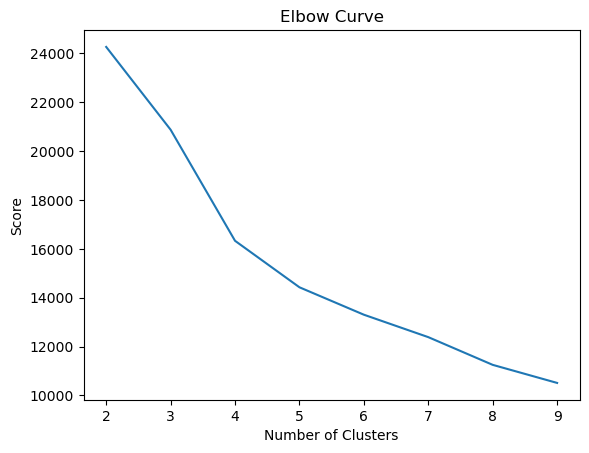

In [62]:
# Plotting the cost
df_cost = pd.DataFrame({
    'cluster': range(2, 10),
    'cost': cost
})

pl.plot(df_cost['cluster'], df_cost['cost'])
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Clustering

In [64]:
import pandas as pd
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn import mixture


In [65]:
# Assuming metadata13 is your DataFrame with PCA features
features = np.stack(pd_df['pca_features'].values)


In [67]:
# K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=3)
pd_df['kmeans_prediction'] = kmeans.fit_predict(features)

# Display the first 5 rows
print(pd_df[['kmeans_prediction']].head())

# Group by cluster and count
print(pd_df['kmeans_prediction'].value_counts())


   kmeans_prediction
0                  2
1                  2
2                  0
3                  3
4                  2
1    2083
0    1992
3    1959
2    1814
Name: kmeans_prediction, dtype: int64


In [69]:

bisecting_kmeans = BisectingKMeans(n_clusters=4, random_state=3)
pd_df['bisecting_kmeans_prediction'] = bisecting_kmeans.fit_predict(features)

# Display the first 5 rows
print(pd_df[['bisecting_kmeans_prediction']].head())

# Group by cluster and count
print(pd_df['bisecting_kmeans_prediction'].value_counts())


   bisecting_kmeans_prediction
0                            0
1                            0
2                            1
3                            3
4                            0
1    2160
2    2032
0    1996
3    1660
Name: bisecting_kmeans_prediction, dtype: int64


## Evaluation

In [70]:
# Evaluation of K-means
kmeans_score = silhouette_score(features, pd_df['kmeans_prediction'])
print(f"K-means Silhouette Score: {kmeans_score}")


# Evaluation of Bisecting K-Means
bisecting_kmeans_score = silhouette_score(features, pd_df['bisecting_kmeans_prediction'])
print(f"Bisecting K-Means Silhouette Score: {bisecting_kmeans_score}")


K-means Silhouette Score: 0.25935401414211584
Bisecting K-Means Silhouette Score: 0.2455503527736292


In [71]:
evals = [
    kmeans_score,
    bisecting_kmeans_score
]
clusteringAlgorithms = ['K-means','Bisecting KMeans']

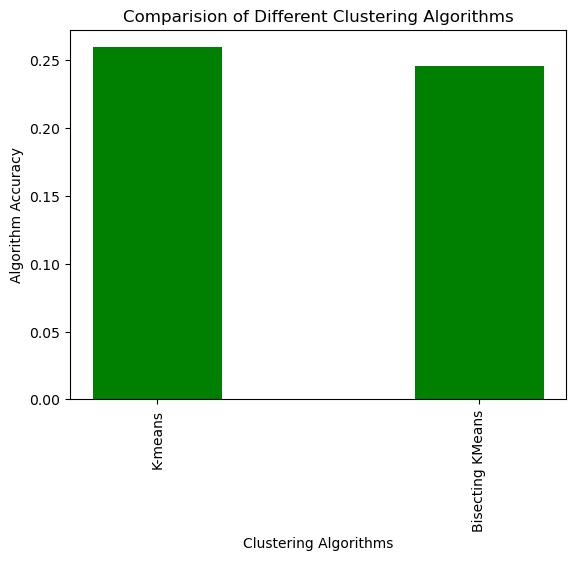

In [72]:
pl.bar(clusteringAlgorithms, evals, color ='green', width = 0.4)
pl.xlabel('Clustering Algorithms')
pl.ylabel('Algorithm Accuracy')
pl.title('Comparision of Different Clustering Algorithms')
pl.xticks(rotation=90)
pl.show()

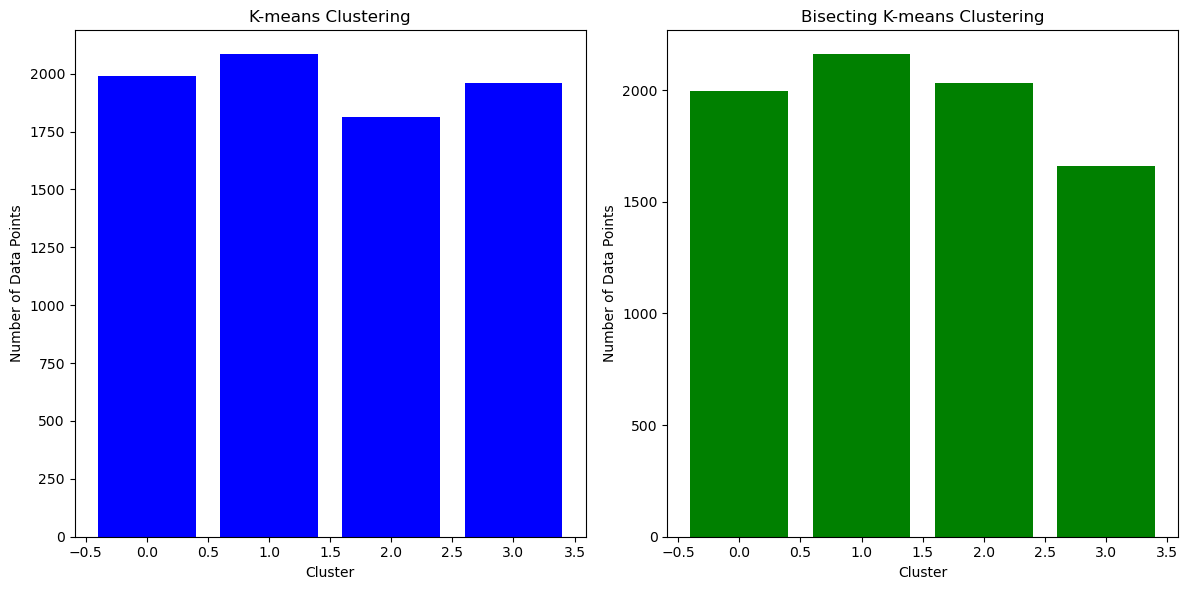

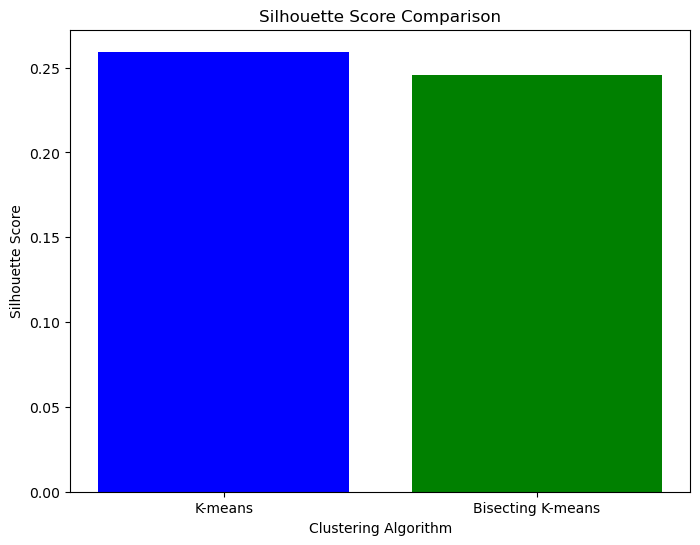

In [73]:

# Plotting the K-means clustering results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(pd_df['kmeans_prediction'].value_counts().index, 
        pd_df['kmeans_prediction'].value_counts().values,
        color='blue')
plt.title('K-means Clustering')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')

# Plotting the Bisecting K-means clustering results
plt.subplot(1, 2, 2)
plt.bar(pd_df['bisecting_kmeans_prediction'].value_counts().index, 
        pd_df['bisecting_kmeans_prediction'].value_counts().values,
        color='green')
plt.title('Bisecting K-means Clustering')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')

plt.tight_layout()
plt.show()

# Plotting Silhouette scores
labels = ['K-means', 'Bisecting K-means']
scores = [0.25935401414211584, 0.2455503527736292]

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])
plt.title('Silhouette Score Comparison')
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')

plt.show()

In [76]:
cluster_data

,sha,source_x,title_stop,abstract_stop,authors_stop,publish_year,doc_lang,doc,embeddings,source_x_index,...,source_x_encoded_28,source_x_encoded_29,source_x_encoded_30,source_x_encoded_31,source_x_encoded_32,source_x_encoded_33,doc_lang_encoded_0,pca_features,kmeans_prediction,bisecting_kmeans_prediction
3,3f6a8fc2249ec3b9bc431c5eded7f6234c75c49d,PMC,"[effect, network, mixing, patterns, epidemic, ...","[networks, nodes, may, preferentially, contact...","[kiss, istvan, z, green, darren, m, kao, rowla...",2007.0,en,"[effect, network, mixing, patterns, epidemic, ...","[0.054170296, 0.041535668, 0.15958582, -0.0549...",31,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"[0.10141377241804538, -0.9989601777374203, -0....",3,3
6,37095beb85663a5f3c4e7a1175e5bff2c6c97855,PMC,"[making, sense, perceptions, risk, diseases, v...","[background, maintaining, high, levels, childh...","[bond, lyndal, nolan, terry]",2011.0,en,"[making, sense, perceptions, risk, diseases, v...","[-0.08924806, 0.2756351, 0.13933654, 0.0117775...",31,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"[0.8055536198657358, -0.4281910644796553, -0.7...",3,3
9,fc7a909258427d608f8f8e3a4d2f3d7ef1dba473,PMC,"[advanced, querying, features, disease, survei...","[automated, disease, surveillance, systems, no...","[hashemian, mohammad, r]",2010.0,en,"[advanced, querying, features, disease, survei...","[0.40549377, 0.10340398, 0.08632004, -0.106631...",31,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"[0.21432127339212254, -1.2531107377155106, -0....",3,3
12,cad994637f061356cd5ea11a7570b2f5ad38ed47,PMC,"[estimating, potential, infection, transmissio...","[background, contacts, patients, patients, hea...","[vanhems, philippe, barrat, alain, cattuto, ci...",2013.0,en,"[estimating, potential, infection, transmissio...","[0.097688, 0.1983933, 0.044095084, -0.01605546...",31,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"[-0.2565656018475196, 0.09515979887493267, -0....",3,1
23,d708b6876813c3915edcbdda08c014d90ec694ab,PMC,"[setting, healthcare, priorities, hospitals, r...","[priority, setting, research, focused, macro, ...","[barasa, edwine, w, molyneux, sassy, english, ...",2014.0,en,"[setting, healthcare, priorities, hospitals, r...","[0.30449778, 0.18142156, 0.095791385, 0.056323...",31,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,"[0.9107016463611621, -0.6315601689312029, -1.1...",3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7833,7c2a7e6cefee455922292580314dad7ff2a93cb7,Elsevier; Medline; PMC,"[catastrophe, radiology, considerations, beyon...","[abstract, disasters, often, occur, without, w...","[grossman, valerie, aarne]",2020.0,en,"[catastrophe, radiology, considerations, beyon...","[-0.080727585, 0.42380232, 0.08616902, 0.17286...",18,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[0.7608083814298829, -0.5232014102644, -0.7863...",3,3
7834,unknown,Medline; WHO,"[join, association, veterinary, consultants]","[article, briefly, describes, activities, asso...","[mccartney, elinor]",2021.0,en,"[join, association, veterinary, consultants, a...","[0.013955838, 0.14778344, 0.31407562, -0.01807...",30,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"[1.0217280359068757, -0.6968506211610599, -0.6...",3,3
7835,11908719250135717350d58c5745b19a904f18a3,Medline; PMC,"[accuracy, usability, diagnostic, decision, su...","[background, increasing, number, diagnostic, d...","[knitza, johannes, tascilar, koray, gruber, ev...",2021.0,en,"[accuracy, usability, diagnostic, decision, su...","[0.29712293, 0.19779691, -0.12064443, -0.00183...",28,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,"[-0.3974995799104152, 0.30784603815050005, -1....",3,1
7841,34a8943839db7ca252b2edb475c846012446f273,Medline; PMC,"[uptake, tele, rehabilitation, finland, amongs...","[covid, 19, pandemic, challenged, rehabilitati...","[heiskanen, tuija, rinne, hanna, miettinen, sa...",2021.0,en,"[uptake, tele, rehabilitation, finland, amongs...","[0.056500632, 0.16350128, 0.051082194, -0.0080...",28,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,"[0.550478078881451, -0.08835434338637231, -1.3...",3,3


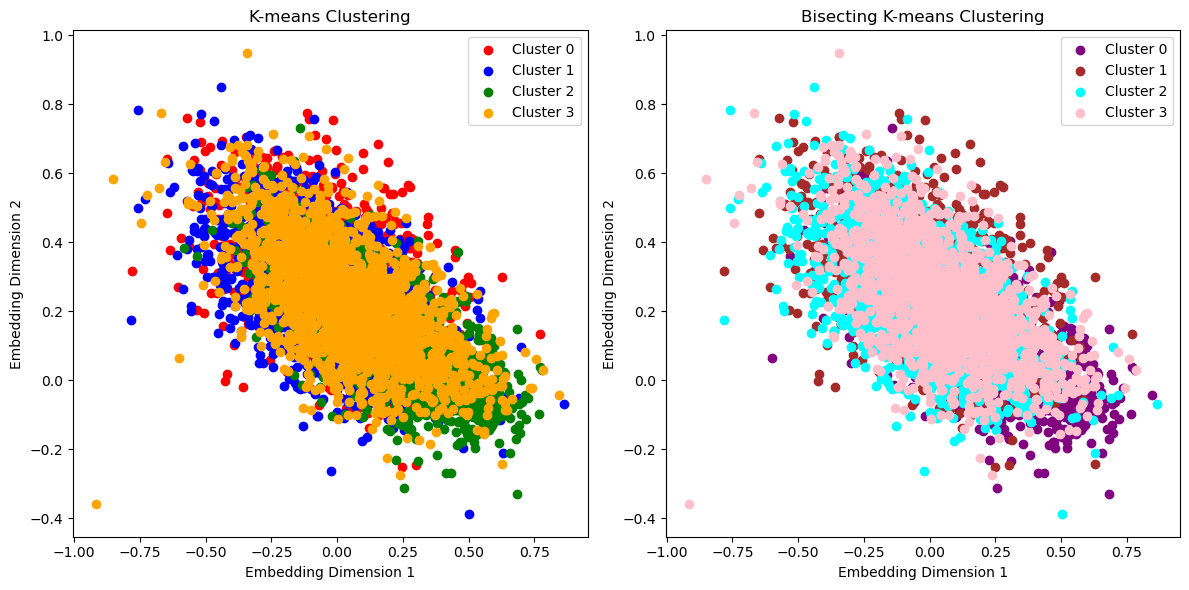

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for cluster in range(4):
    cluster_data = pd_df[pd_df['kmeans_prediction'] == cluster]
    plt.scatter(cluster_data['embeddings'].apply(lambda x: x[0]), 
                cluster_data['embeddings'].apply(lambda x: x[1]), 
                color=colors_kmeans[cluster], 
                label=f'Cluster {cluster}')
plt.title('K-means Clustering')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.legend()

plt.subplot(1, 2, 2)
for cluster in range(4):
    cluster_data = pd_df[pd_df['bisecting_kmeans_prediction'] == cluster]
    plt.scatter(cluster_data['embeddings'].apply(lambda x: x[0]), 
                cluster_data['embeddings'].apply(lambda x: x[1]), 
                color=colors_bisecting[cluster], 
                label=f'Cluster {cluster}')
plt.title('Bisecting K-means Clustering')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.legend()

plt.tight_layout()
plt.show()
